In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter(action='ignore')

In [ ]:
#data preparation

In [5]:
car = pd.read_csv(r"C:\Users\Menka\Downloads\archive\quikr_car.csv")
car

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,"80,000","45,000 kms",Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,"4,25,000",40 kms,Diesel
2,Maruti Suzuki Alto 800 Vxi,Maruti,2018,Ask For Price,"22,000 kms",Petrol
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,"3,25,000","28,000 kms",Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,"5,75,000","36,000 kms",Diesel
...,...,...,...,...,...,...
887,Ta,Tara,zest,"3,10,000",NaN,NaN
888,Tata Zest XM Diesel,Tata,2018,"2,60,000","27,000 kms",Diesel
889,Mahindra Quanto C8,Mahindra,2013,"3,90,000","40,000 kms",Diesel
890,Honda Amaze 1.2 E i VTEC,Honda,2014,"1,80,000",Petrol,NaN


In [6]:
car.shape

(892, 6)

In [8]:
car.describe()

,name,company,year,Price,kms_driven,fuel_type
count,892,892,892,892,840,837
unique,525,48,61,274,258,3
top,Honda City,Maruti,2015,Ask For Price,"45,000 kms",Petrol
freq,13,235,117,35,30,440


In [9]:
len(car)

892

In [13]:
car.info()

<class 'pandas.core.frame.DataFrame'>
Index: 749 entries, 0 to 891
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        749 non-null    object
 1   company     749 non-null    object
 2   year        749 non-null    object
 3   Price       749 non-null    object
 4   kms_driven  748 non-null    object
 5   fuel_type   745 non-null    object
dtypes: object(6)
memory usage: 41.0+ KB


Cleaning

In [10]:
backup = car.copy()

In [11]:
car = car.drop_duplicates()

In [14]:
car = car[car['year'].str.isnumeric()]

In [15]:
car['year'] = car['year'].astype(int)

In [16]:
car = car[car['Price'] != 'Ask For Price']

In [17]:
car['Price'] = car['Price'].str.replace(',', '').astype(float)

In [18]:
car['kms_driven'] = car['kms_driven'].str.split(" ").str.get(0).str.replace(',','')

In [19]:
car = car[car['kms_driven'].str.isnumeric()]

In [20]:

car['kms_driven'] = car['kms_driven'].astype(int)

In [21]:
car['name'] = car['name'].str.split(' ').str.slice(0,3).str.join(' ')

In [22]:
car = car[~car['fuel_type'].isna()]

In [23]:
car.describe()

,year,Price,kms_driven
count,724.000000,7.240000e+02,724.000000
mean,2012.321823,4.032451e+05,46791.342541
std,4.122940,4.802936e+05,34575.416435
min,1995.000000,3.000000e+04,0.000000
25%,2010.000000,1.650000e+05,27000.000000
50%,2013.000000,2.900000e+05,42000.000000
75%,2015.000000,4.899990e+05,59000.000000
max,2019.000000,8.500003e+06,400000.000000


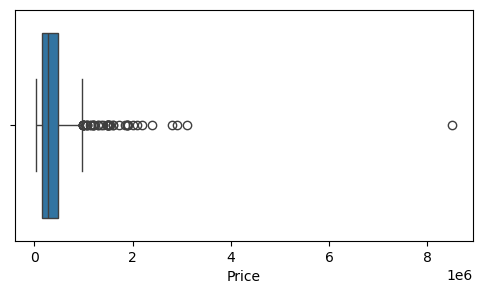

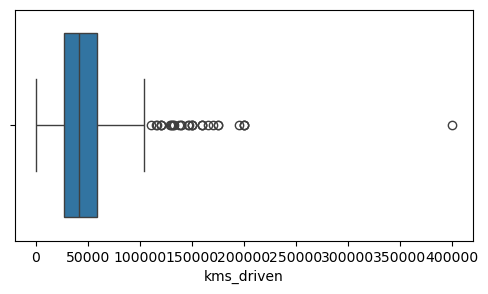

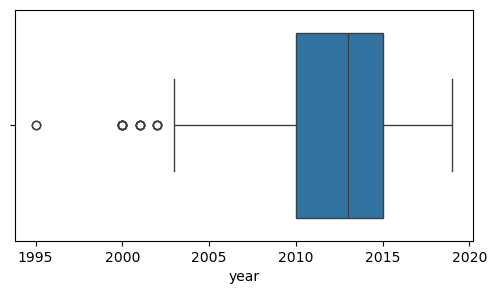

In [24]:
num_cols = ['Price','kms_driven','year']
i=0
while i < 3:
    fig = plt.figure(figsize=[13,3])
    
    plt.subplot(1,2,1)
    sns.boxplot(x=num_cols[i], data=car)
    i += 1
    
#     plt.subplot(1,2,2)
#     sns.boxplot(x=num_cols[i], data=car)
#     i += 1
    
    plt.show()

In [25]:
def remove_outliers(column_name, cars_df):
    q1 = cars_df[column_name].quantile(0.25)
    q3 = cars_df[column_name].quantile(0.75)
    IQR = q3 - q1
    cars_df = cars_df.loc[~((cars_df[column_name] < (q1  - 1.5 * IQR)) | (cars_df[column_name] > (q3 + 1.5 * IQR)))]
    cars_df.boxplot(column=column_name)
    return cars_df

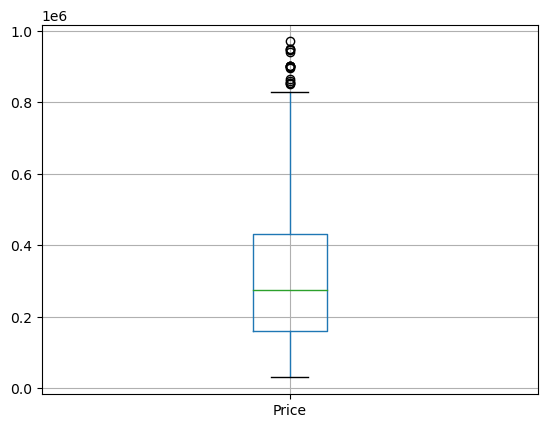

In [26]:
car = remove_outliers('Price',car)

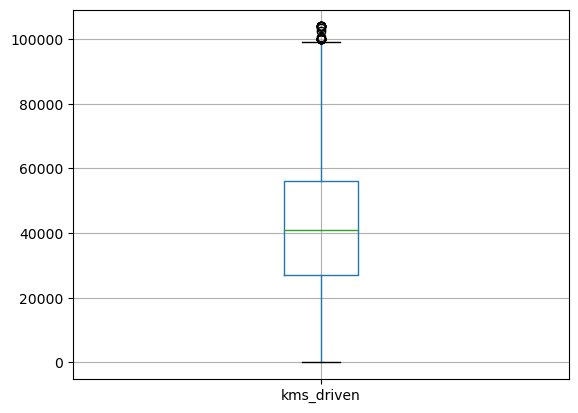

In [27]:
car = remove_outliers('kms_driven',car)

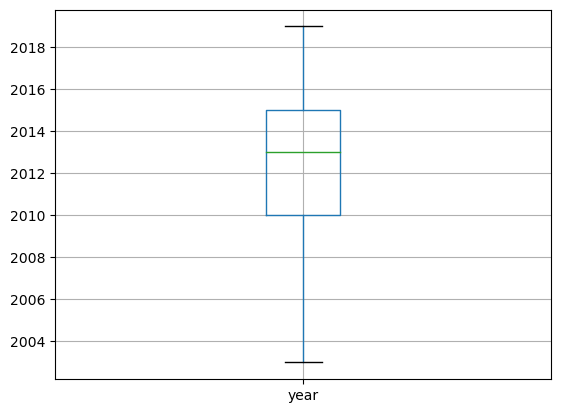

In [28]:
car = remove_outliers('year',car)

In [29]:
car.describe()

,year,Price,kms_driven
count,633.000000,633.000000,633.000000
mean,2012.532385,325378.418641,42219.586098
std,3.682319,200572.661922,23580.618369
min,2003.000000,32000.000000,0.000000
25%,2010.000000,168000.000000,27000.000000
50%,2013.000000,280000.000000,41000.000000
75%,2015.000000,449999.000000,55700.000000
max,2019.000000,970000.000000,104000.000000


In [30]:
car.shape

(633, 6)

In [8]:
#exploratory data analysis

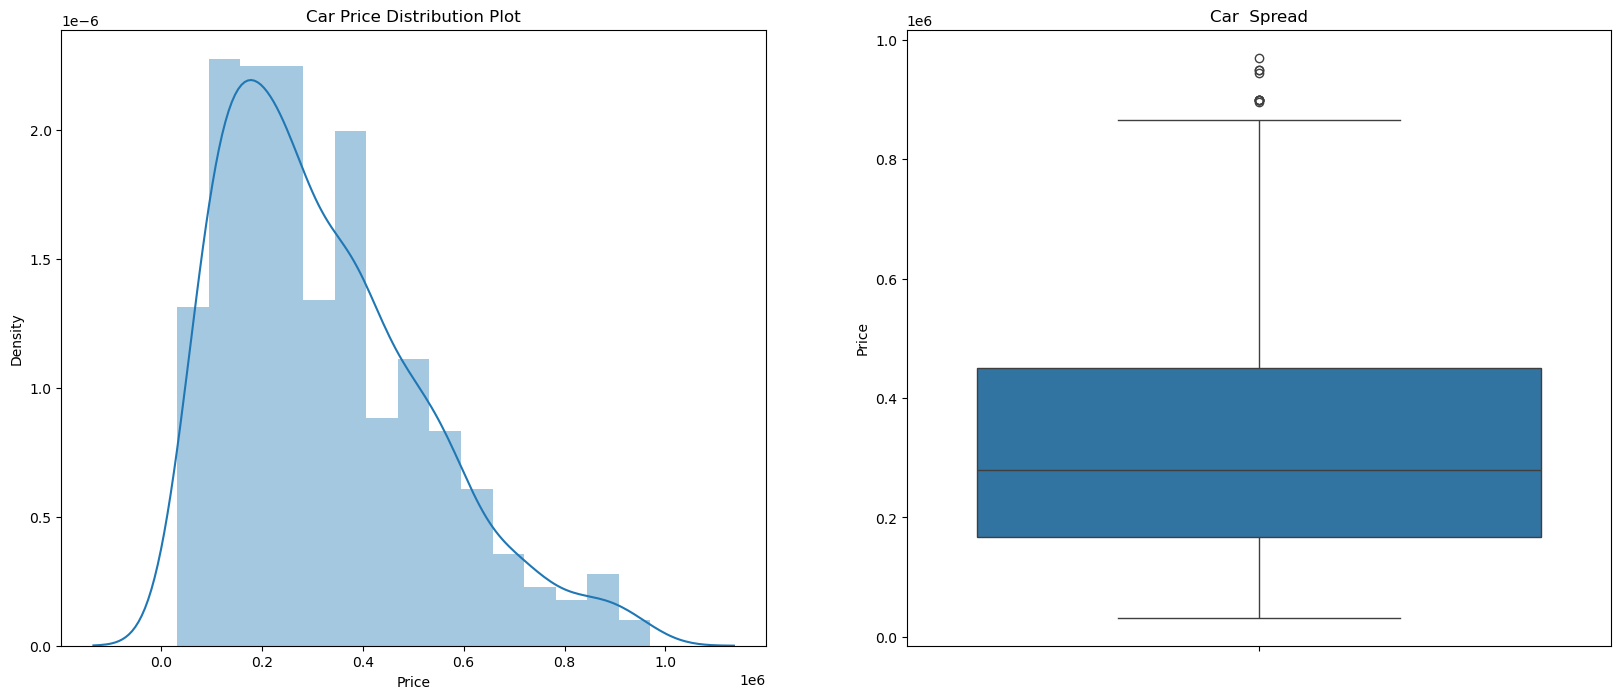

In [31]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title(f'Car Price Distribution Plot')
sns.distplot(car['Price'])

plt.subplot(1,2,2)
plt.title(f'Car  Spread')
sns.boxplot(y=car['Price'])

plt.show()

In [32]:
print(car.Price.describe(percentiles = [0.25,0.50,0.75,0.85,0.90,1]))


count       633.000000
mean     325378.418641
std      200572.661922
min       32000.000000
25%      168000.000000
50%      280000.000000
75%      449999.000000
85%      549000.000000
90%      599999.800000
100%     970000.000000
max      970000.000000
Name: Price, dtype: float64


<Axes: xlabel='Price', ylabel='Density'>

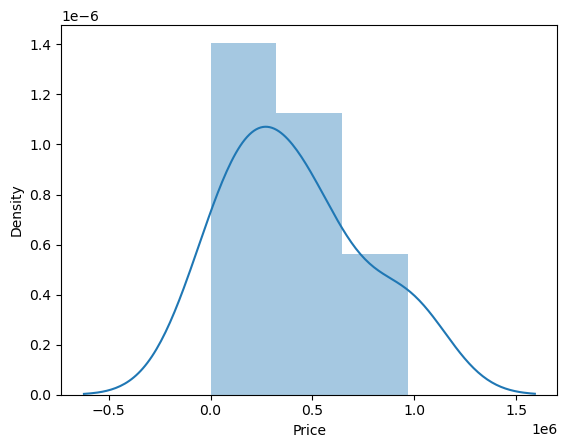

In [33]:
sns.distplot(car.Price.describe(percentiles = [0.25,0.50,0.75,0.85,0.90,1]))

In [34]:
car.reset_index(drop=True,inplace=True)

In [35]:

car.to_csv('Cleaned Car.csv')

Model

In [37]:
X = car.drop(columns='Price')
y = car['Price']

In [38]:
from sklearn.model_selection import train_test_split


In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [40]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline

In [41]:
ohe = OneHotEncoder()
ohe.fit(X[['name','company','fuel_type']])

OneHotEncoder()

In [42]:
column_trans = make_column_transformer((OneHotEncoder(categories=ohe.categories_),['name','company','fuel_type']),
                                      remainder='passthrough')

In [43]:
lr = LinearRegression()

In [44]:
pipe = make_pipeline(column_trans,lr)

In [45]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['Audi A4 1.8', 'Audi Q7', 'BMW 3 Series', 'BMW 5 Series',
       'Chevrolet Beat', 'Chevrolet Beat Diesel', 'Chevrolet Beat LS',
       'Chevrolet Beat LT', 'Chevrolet Beat PS', 'Chevrolet Cruze LTZ',
       'Chevrolet Enjoy', 'Chevrolet Enjoy 1.4', 'Chevrolet S...
       'Volkswagen Vento Konekt'], dtype=object),
                                                                            array(['Audi', 'BMW', 'Chevrolet', 'Datsun', 'Fiat', 'Force', 'Ford',
       'Honda', 'Hyundai', 'Jeep', 'Mahindra', 'Maruti', 'Mercedes',
       'Mitsubishi', 'Nissan', 'Renault', 'Skoda', 'Tata', 'Toyota',
       'Volkswagen'], dtype=object),
                                                                            array(['Diesel', 'LPG', 'Petrol'], dtype=object)]),
                                                  ['name', 'company',
                                                   'fuel_type'])])),
                ('linearregression', LinearRegression())])

In [46]:
y_pred = pipe.predict(X_test)

In [47]:
r2_score(y_test,y_pred)

0.6180613507724135

In [48]:
scores = []
for i in range(1000):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=i)
    lr = LinearRegression()
    pipe = make_pipeline(column_trans,lr)
    pipe.fit(X_train,y_train)
    y_pred = pipe.predict(X_test)
    scores.append(r2_score(y_test,y_pred)) 

In [49]:
import numpy as np
np.argmax(scores)

947

In [50]:
scores[np.argmax(scores)]

0.7836474069786243

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=np.argmax(scores))
lr = LinearRegression()
pipe = make_pipeline(column_trans,lr)
pipe.fit(X_train,y_train)
y_pred = pipe.predict(X_test)
print(r2_score(y_test,y_pred))

0.7836474069786243


In [52]:
import pickle

In [53]:
pickle.dump(pipe,open('LinearRegressionModel.pkl','wb'))

In [54]:
pipe.predict(pd.DataFrame([['Maruti Suzuki Swift','Maruti',2019,100,'Petrol']],columns=['name','company','year','kms_driven','fuel_type']))

array([468650.20773217])

In [55]:
import sklearn
print(sklearn.__version__)

1.5.1
